In [2]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np
import seaborn as sns

In [3]:
#Read in cleased data file
file_6 = "Resources/time_bin.csv"
time_df = pd.read_csv(file_6)

time_df.head()

Index  Year        Date       Day   Time Severity  Casualties  \
0  201001BS70003  2010  2010-01-11    Monday  07:30   Slight           1   
1  201001BS70004  2010  2010-01-11    Monday  18:35   Slight           1   
2  201001BS70007  2010  2010-01-02  Saturday  21:21   Slight           1   
3  201001BS70007  2010  2010-01-02  Saturday  21:21   Slight           1   
4  201001BS70008  2010  2010-01-04    Monday  20:35   Slight           1   

                                       Location  Gender  Time_f  \
0  Mid Junction - on roundabout or on main road  Female       7   
1  Mid Junction - on roundabout or on main road    Male      18   
2  Mid Junction - on roundabout or on main road  Female      21   
3  Mid Junction - on roundabout or on main road  Female      21   
4  Mid Junction - on roundabout or on main road    Male      20   

          Time_Bin  
0  Morning Commute  
1  Evening Commute  
2          Late PM  
3          Late PM  
4          Late PM

<IPython.core.display.Javascript object>


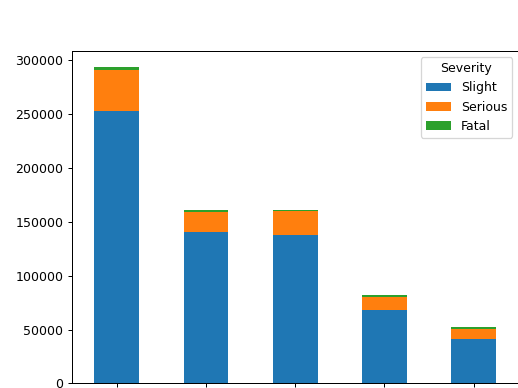

<AxesSubplot:>

In [5]:
accident_sev_tod = time_df.groupby(['Time_Bin','Severity'])['Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_tod.sort_values(by=['Slight','Serious','Fatal'], ascending=False)
sorted_df = sorted_df[["Slight","Serious","Fatal"]]
sorted_df.plot.bar(stacked=True)

<IPython.core.display.Javascript object>


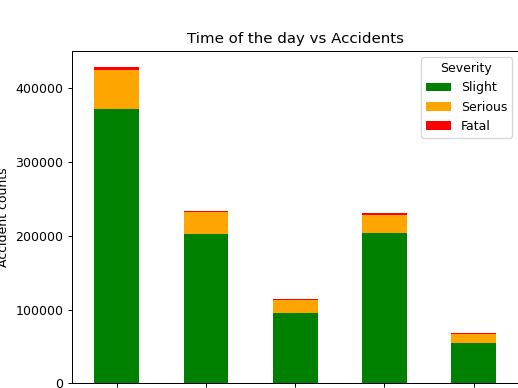

Severity         Slight  Serious  Fatal
Time_Bin                               
Day Time         372285    52566   4261
Evening Commute  202126    29848   2292
Late PM           96143    16441   1960
Morning Commute  203164    25622   1912
Early AM          55444    11768   1821


In [19]:
tod_group = time_df.groupby(["Time_Bin","Severity"])
tod_group_count = tod_group["Severity"].count().unstack()
tod_group_count = tod_group_count.sort_values(by=["Fatal","Serious","Slight"], ascending=False)
tod_group_count = tod_group_count[["Slight","Serious","Fatal"]]
tod_group_count.plot.bar(stacked=True, color={"Fatal": "red", "Serious": "orange", "Slight":"green"})
# plt.figure(figsize=(10,6))
plt.title('Time of the day vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Time of the day")
plt.ylabel("Accident counts")
print(tod_group_count)
plt.savefig("Images/Accident_distribution_time_of_day.png", bbox_inches = "tight")

<IPython.core.display.Javascript object>


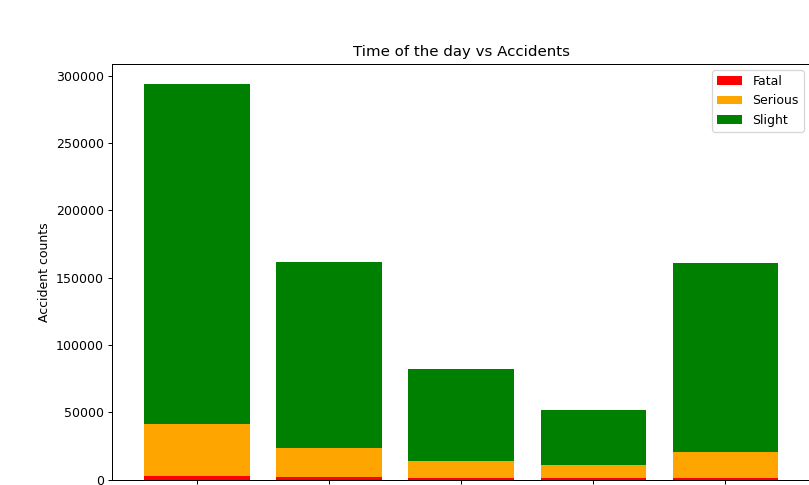

In [13]:
accident_sev_tod = time_df.groupby(['Time_Bin','Severity'])['Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_tod.sort_values(by=['Fatal','Serious','Slight'], ascending=False)
bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

r = sorted_df['Time_Bin']

sum12 = bar1+bar2

plt.figure(figsize=(10,6))
plt.title('Time of the day vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Time of the day")
plt.ylabel("Accident counts")


plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='orange', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='green',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Accident_distribution_time_of_day.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


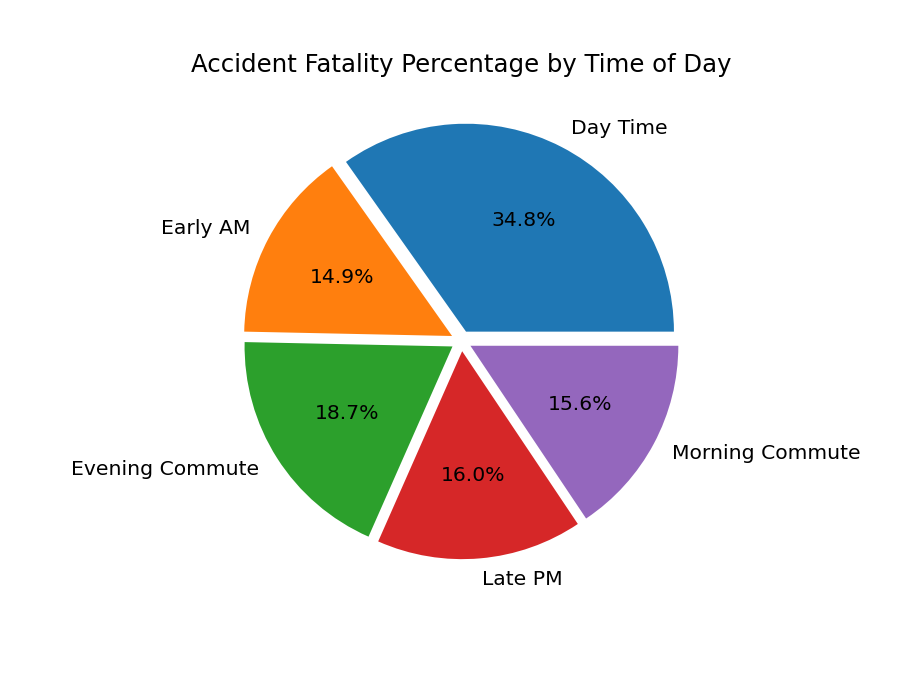

In [31]:
accident_counts = time_df.groupby(['Time_Bin', 'Severity']).size()
accident_counts = accident_counts.unstack(['Severity'])
acc_counts_dropped = accident_counts.drop(accident_counts.columns[[1,2]],axis=1)
total=acc_counts_dropped['Fatal'].sum()
acc_counts_dropped['Percent Fatality']=round(acc_counts_dropped['Fatal']/total*100, 2)
final_acc_df = acc_counts_dropped.reset_index()
plt.figure(figsize=(8,6))
explode = [0.05,0.05,0.05,0.05,0.05]
my_data = acc_counts_dropped['Percent Fatality'].tolist()
my_labels = final_acc_df['Time_Bin'].tolist()
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', explode=explode)
plt.rcParams['font.size'] = 13
plt.title('Accident Fatality Percentage by Time of Day')
plt.savefig("Images/Accident_Fatality_%_by_Time_of_Day.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


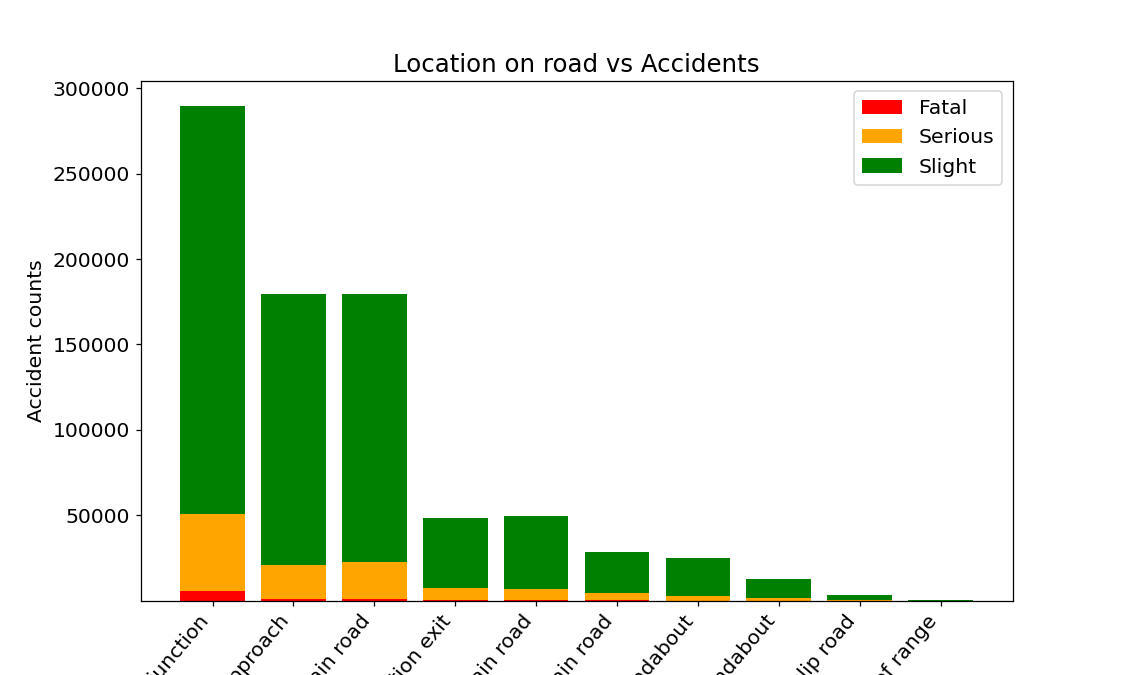

In [32]:
accident_sev_loc = time_df.groupby(['Location','Severity'])['Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_loc.sort_values(by=['Fatal','Serious','Slight'], ascending=False)

bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

r = sorted_df['Location']

sum12 = bar1+bar2

plt.figure(figsize=(10,6))
plt.title('Location on road vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Location on the road")
plt.ylabel("Accident counts")
plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='orange', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='green',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Accident_distribution_location_on_road.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


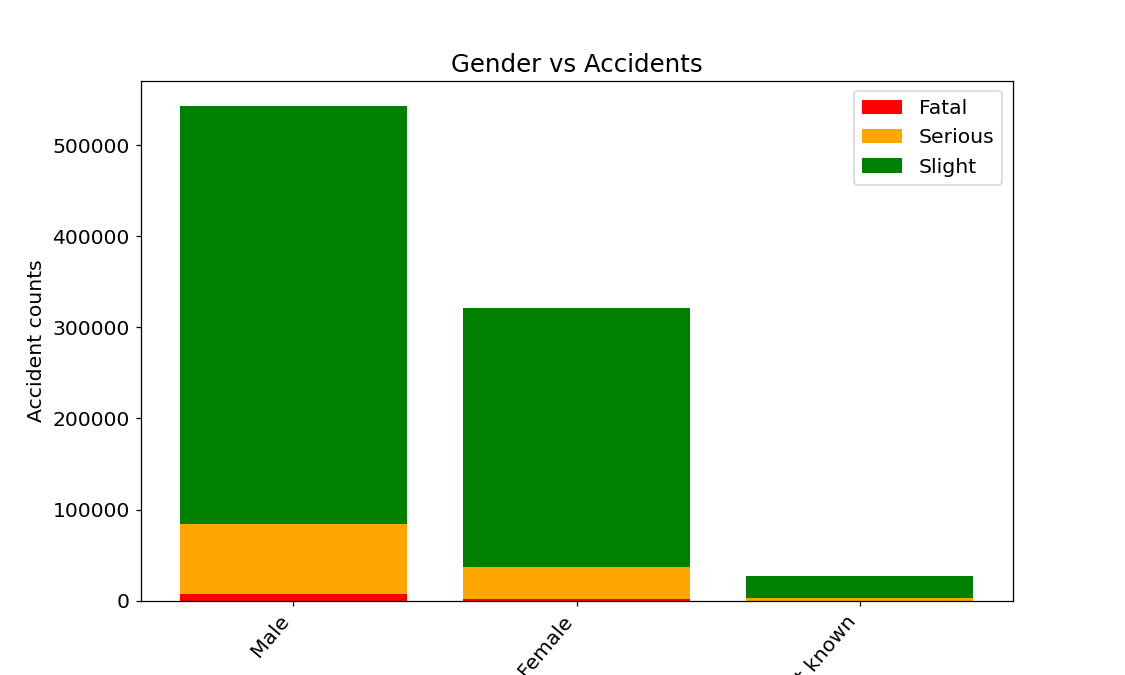

In [33]:
accident_sev_gen = time_df.groupby(['Gender','Severity'])['Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_gen.sort_values(by=['Fatal','Serious','Slight'], ascending=False)

bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

r = sorted_df['Gender']

sum12 = bar1+bar2

plt.figure(figsize=(10,6))
plt.title('Gender vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Gender")
plt.ylabel("Accident counts")
plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='orange', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='green',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Accident_distribution_Gender.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


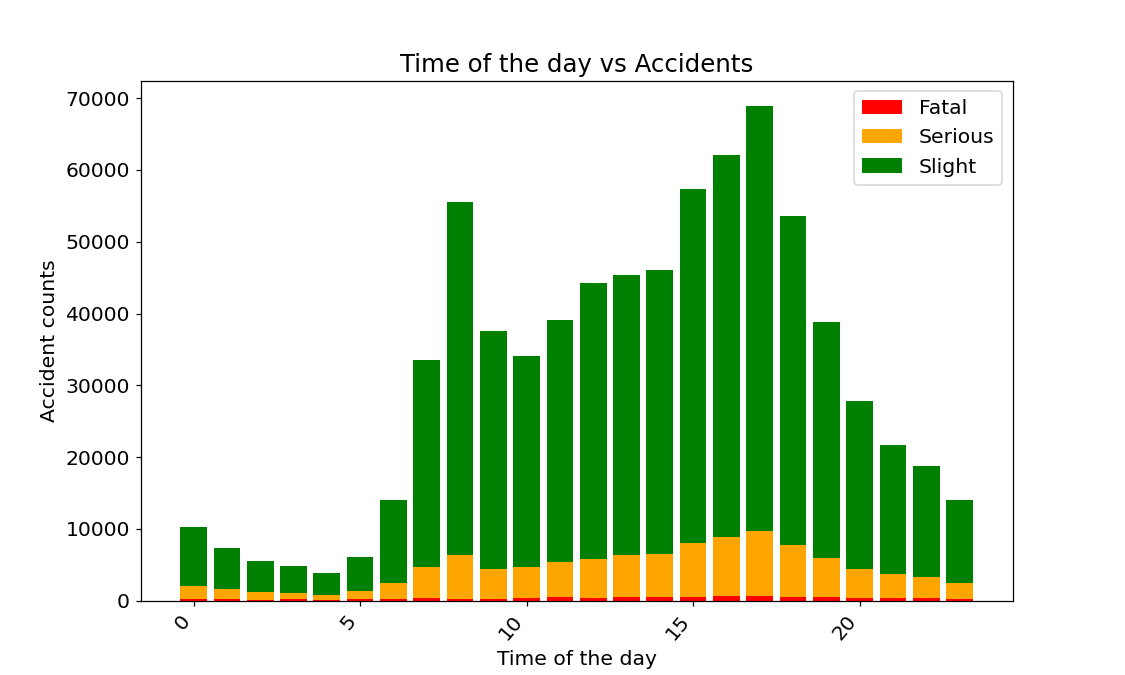

In [34]:
accident_sev_time = time_df.groupby(['Time_f','Severity'])['Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_time.sort_values(by=['Fatal','Serious','Slight'], ascending=False)

bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

r = sorted_df['Time_f']

sum12 = bar1+bar2

plt.figure(figsize=(10,6))
plt.title('Time of the day vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Time of the day")
plt.ylabel("Accident counts")
plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='orange', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='green',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Accident_distribution_time_of_day_hrs.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


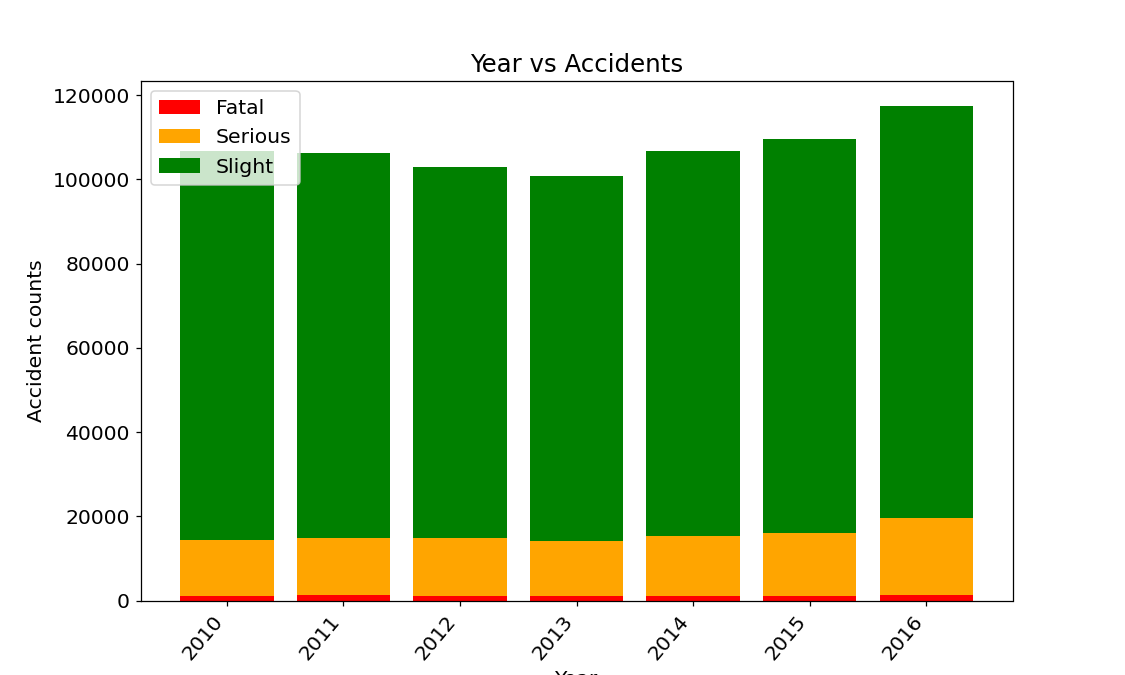

In [35]:
accident_sev_yr = time_df.groupby(['Year','Severity'])['Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_yr.sort_values(by=['Fatal','Serious','Slight'], ascending=False)

bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

r = sorted_df['Year']

sum12 = bar1+bar2

plt.figure(figsize=(10,6))
plt.title('Year vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Year")
plt.ylabel("Accident counts")
plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='orange', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='green',label='Slight')
plt.legend(loc="upper left")
plt.savefig("Images/Accident_distribution_year.png", bbox_inches = "tight")
plt.show()

In [36]:
time_df["Index"].count()

1077653

In [37]:
#Read in cleased data file
file_7 = "Resources/all.csv"
all_df = pd.read_csv(file_7)

all_df.info()

C:\Users\gcwhi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077653 entries, 0 to 1077652
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1077653 non-null  int64  
 1   Accident_Index               1077653 non-null  object 
 2   1st_Road_Class               1077653 non-null  object 
 3   Accident_Severity            1077653 non-null  object 
 4   Year                         1077653 non-null  int64  
 5   Date                         1077653 non-null  object 
 6   Day_of_Week                  1077653 non-null  object 
 7   Latitude                     1077653 non-null  float64
 8   Light_Conditions             1077653 non-null  object 
 9   Local_Authority_(District)   1077653 non-null  object 
 10  Longitude                    1077653 non-null  float64
 11  Number_of_Casualties         1077653 non-null  int64  
 12  Number_of_Vehicles           1077653 non-n

<IPython.core.display.Javascript object>


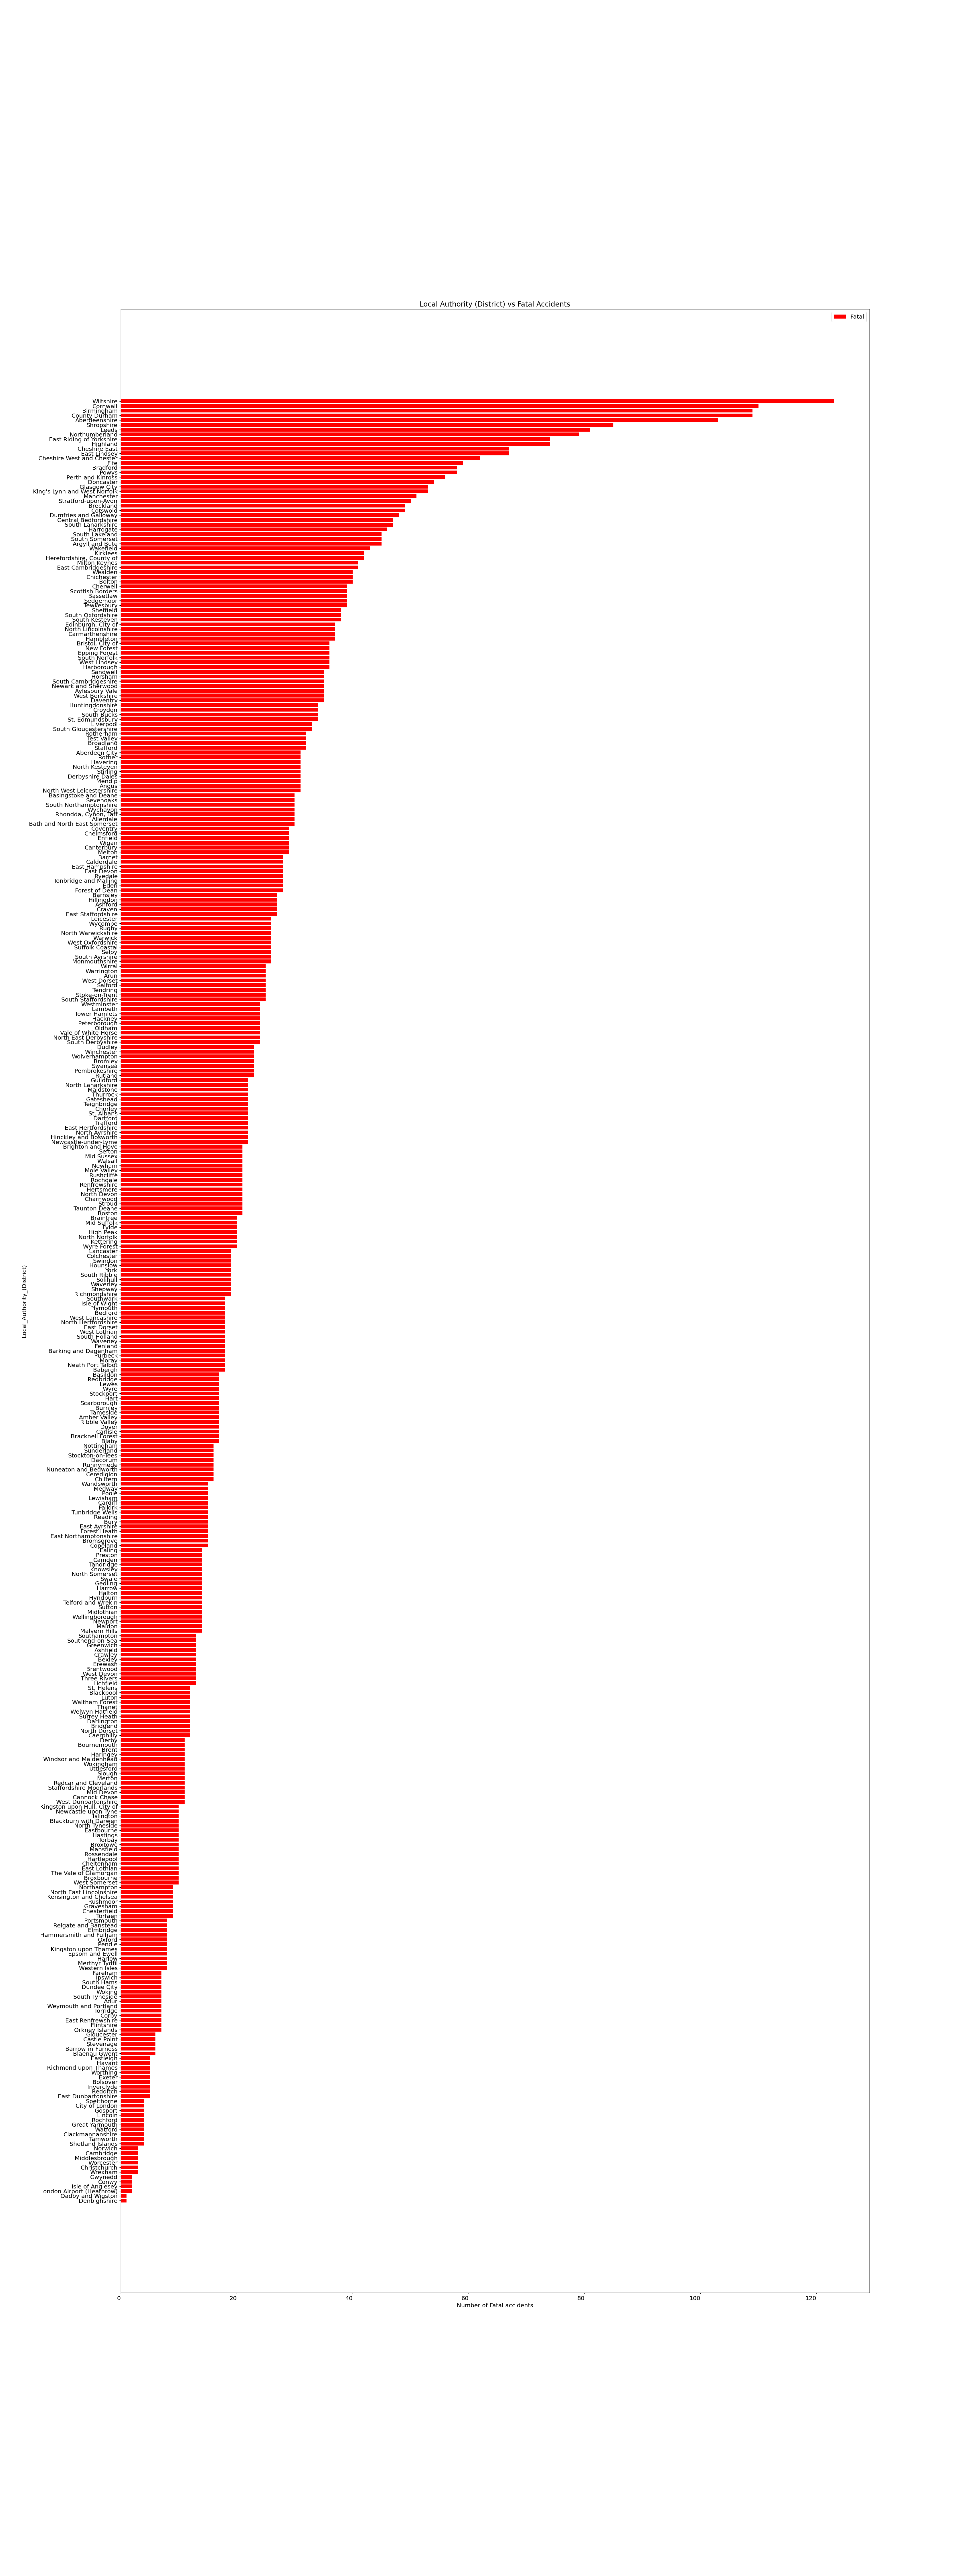

In [38]:
accident_sev_dist = all_df.groupby(['Local_Authority_(District)','Accident_Severity'])['Accident_Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_dist.sort_values(by=['Fatal','Serious','Slight'], ascending=True)

bar1 = sorted_df['Fatal']
#bar2 = sorted_df['Serious']
#bar3 = sorted_df['Slight']

r = sorted_df['Local_Authority_(District)']

#sum12 = bar1+bar2

plt.figure(figsize=(30,80))
plt.title('Local Authority (District) vs Fatal Accidents')
plt.xticks(rotation = 0, horizontalalignment="right")

plt.xlabel("Number of Fatal accidents")
plt.ylabel("Local_Authority_(District)")
plt.barh(r,bar1,color='red', label='Fatal')
#plt.barh(r,bar2, bottom=bar1,color='green', label='Serious')
#plt.barh(r,bar3,bottom=sum12,color='orange',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Fatal_Accident_distribution_Local_Authority_(District).png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


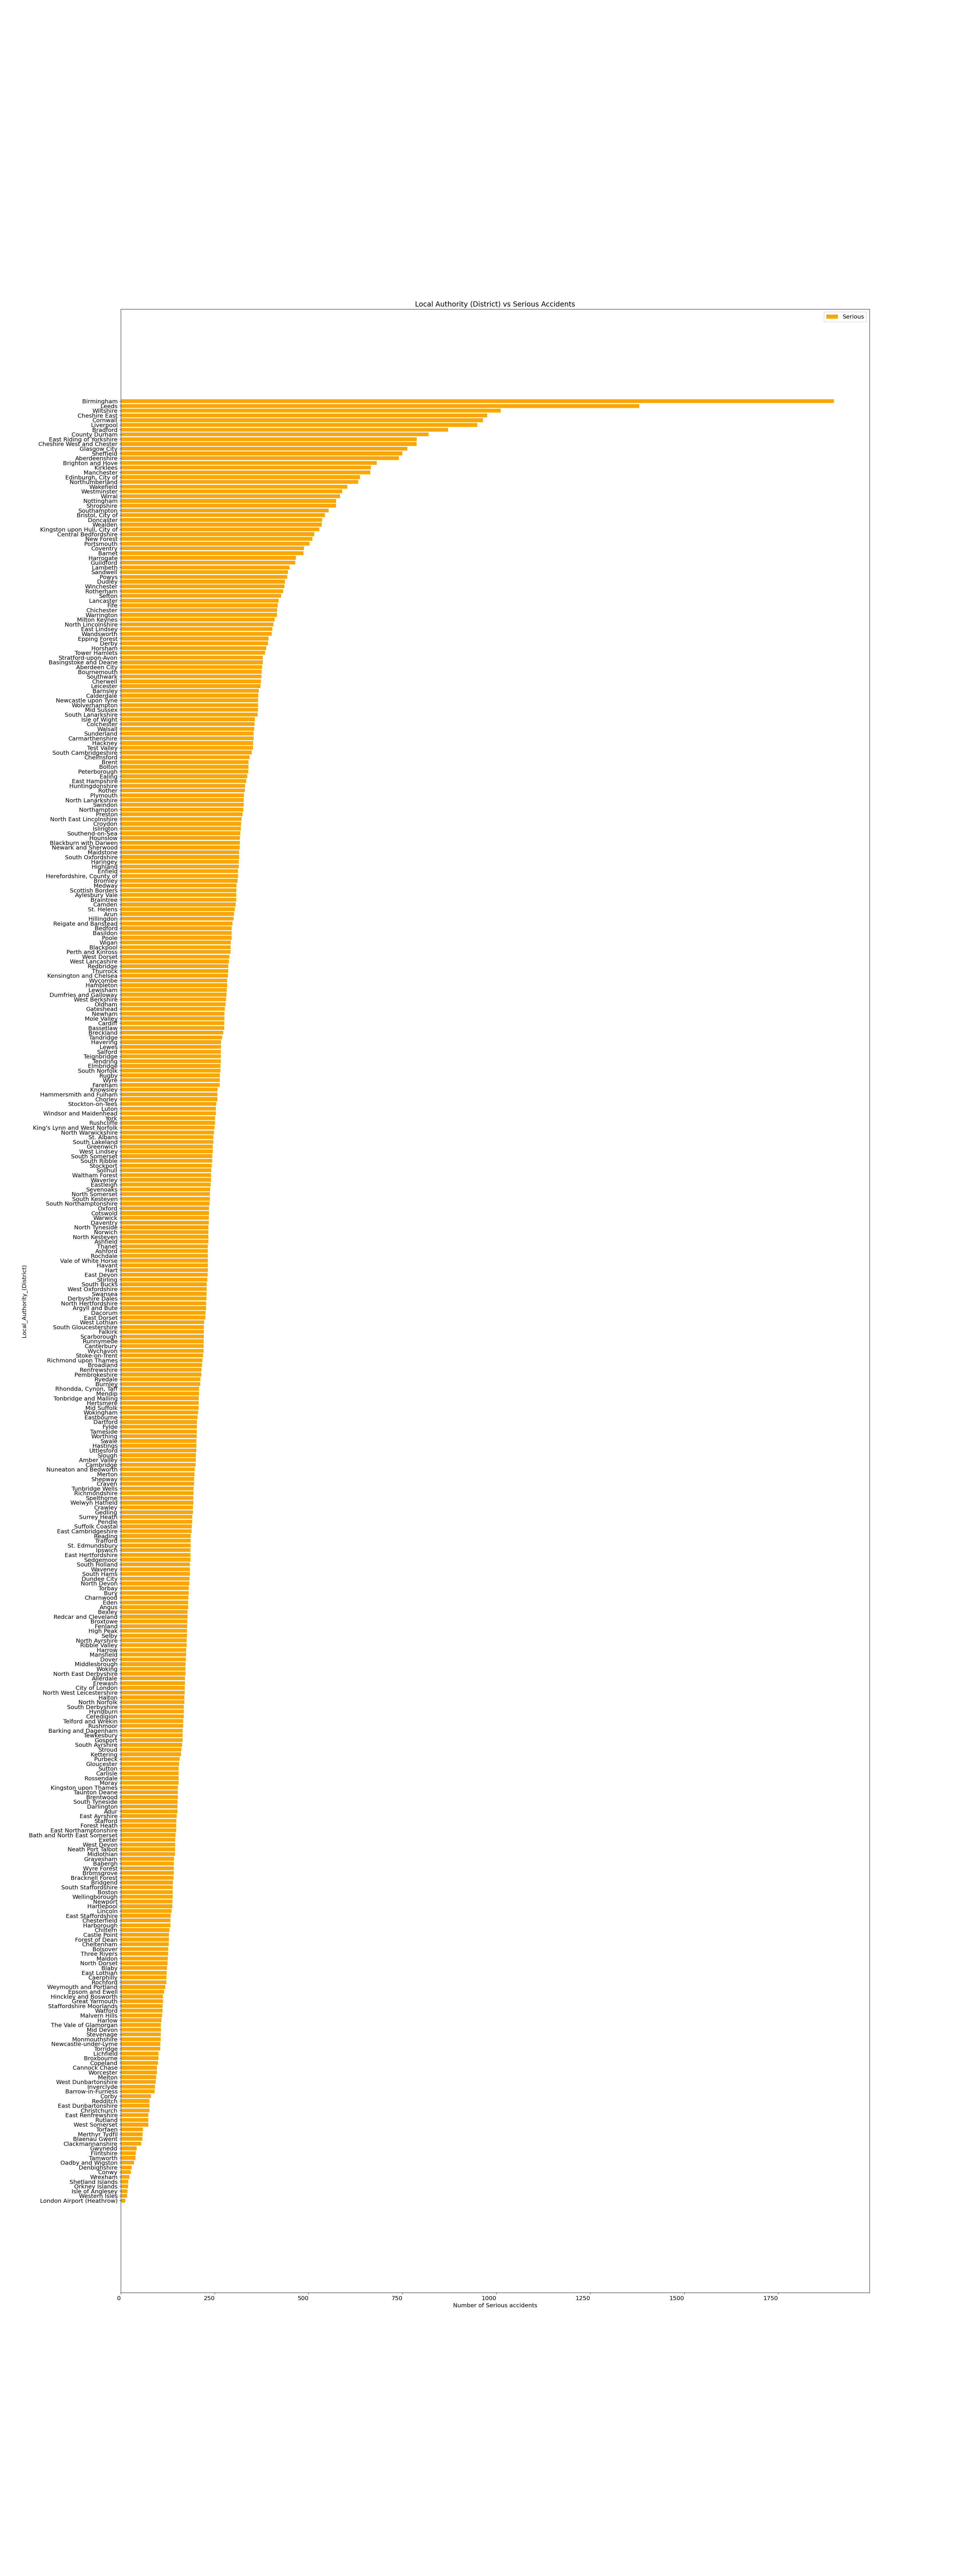

In [39]:
accident_sev_dist = all_df.groupby(['Local_Authority_(District)','Accident_Severity'])['Accident_Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_dist.sort_values(by=['Serious','Slight'], ascending=True)

bar1 = sorted_df['Serious']
#bar2 = sorted_df['Serious']
#bar3 = sorted_df['Slight']

r = sorted_df['Local_Authority_(District)']

#sum12 = bar1+bar2

plt.figure(figsize=(30,80))
plt.title('Local Authority (District) vs Serious Accidents')
plt.xticks(rotation = 0, horizontalalignment="right")

plt.xlabel("Number of Serious accidents")
plt.ylabel("Local_Authority_(District)")
plt.barh(r,bar1,color='orange', label='Serious')
#plt.barh(r,bar2, bottom=bar1,color='green', label='Serious')
#plt.barh(r,bar3,bottom=sum12,color='orange',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Serious_Accident_distribution_Local_Authority_(District).png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


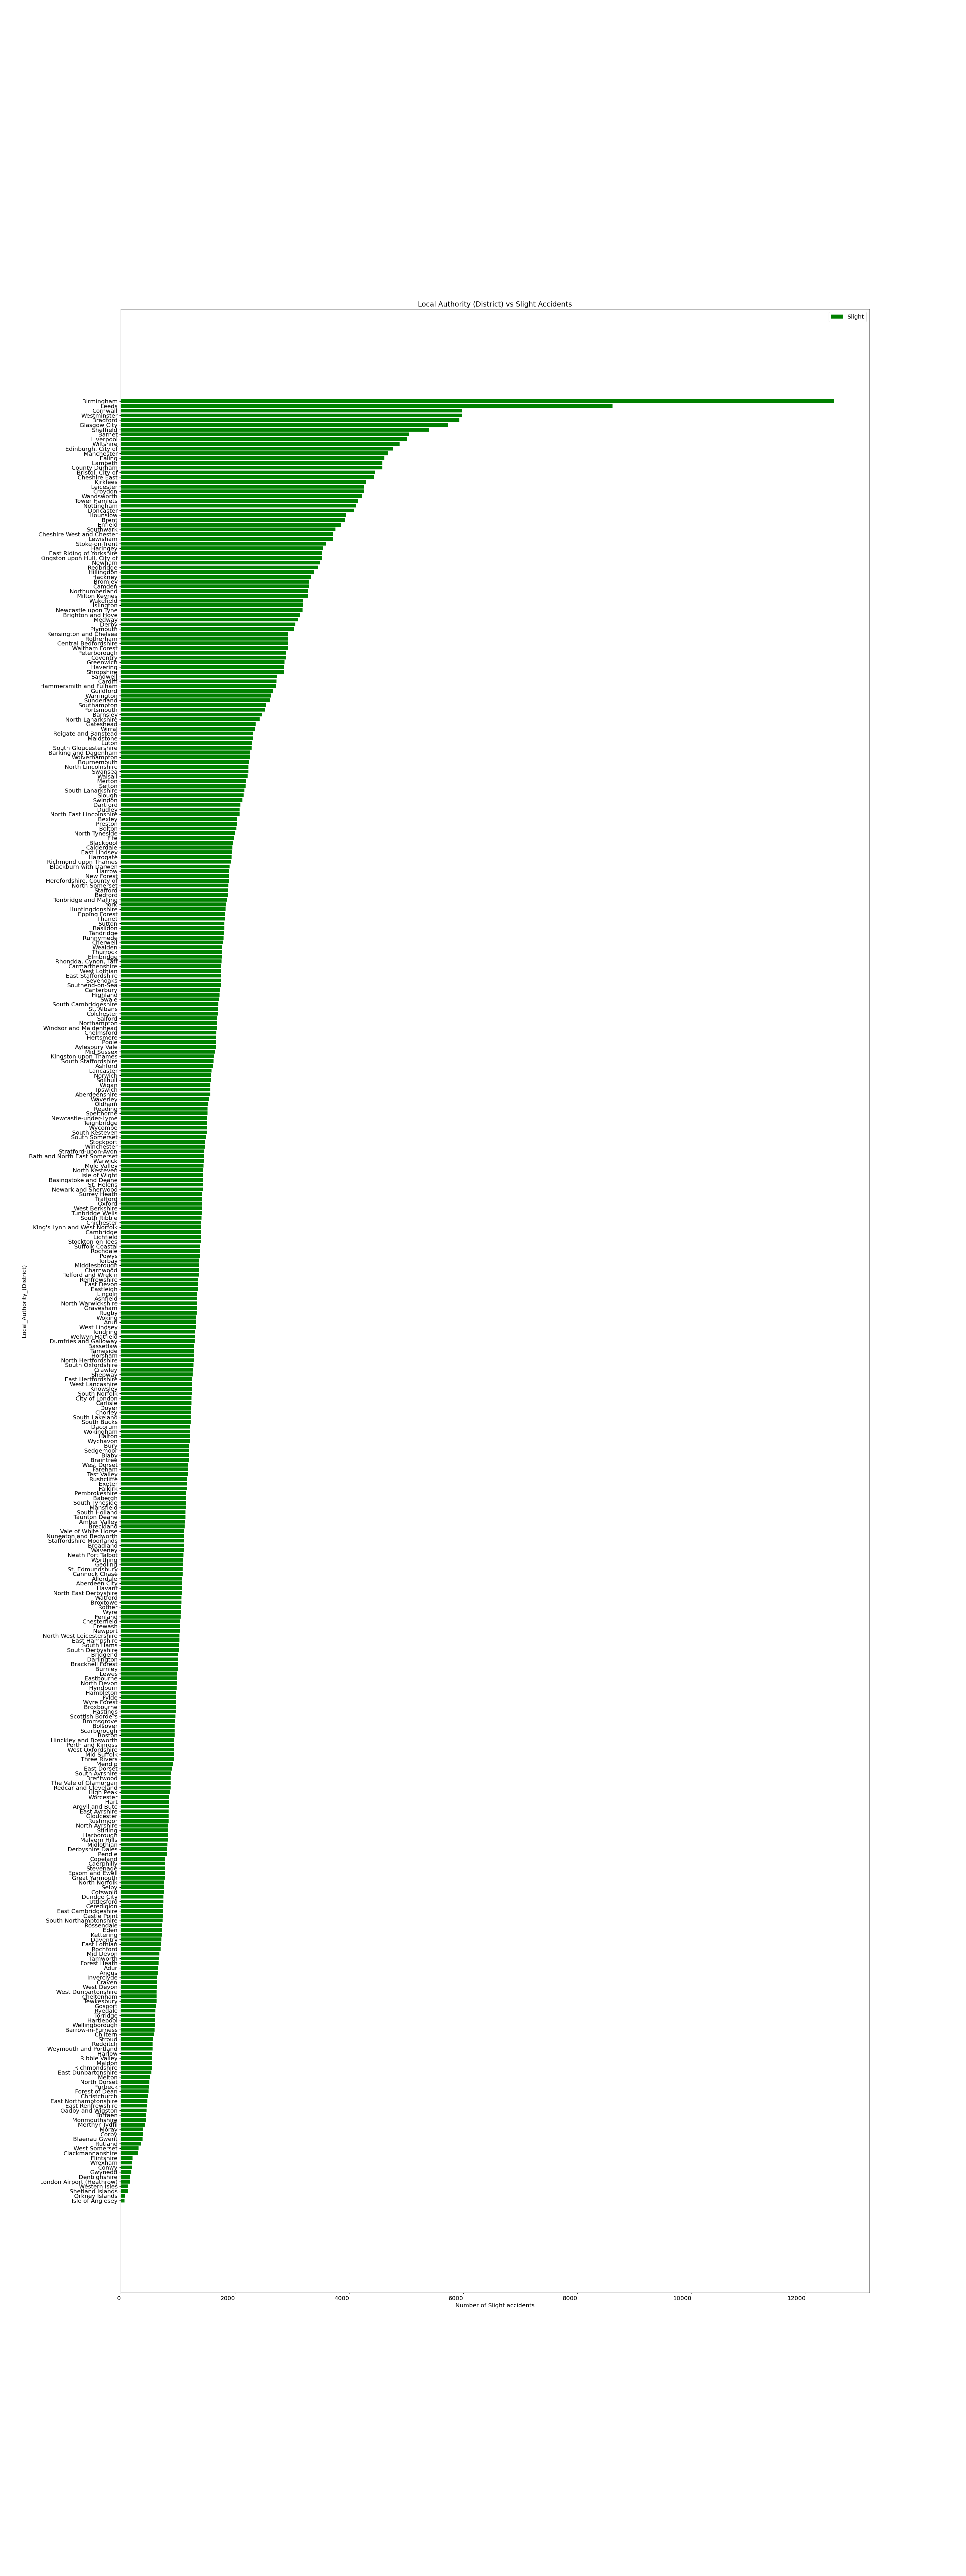

In [40]:
accident_sev_dist = all_df.groupby(['Local_Authority_(District)','Accident_Severity'])['Accident_Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_dist.sort_values(by=['Slight'], ascending=True)

bar1 = sorted_df['Slight']
#bar2 = sorted_df['Serious']
#bar3 = sorted_df['Slight']

r = sorted_df['Local_Authority_(District)']

#sum12 = bar1+bar2

plt.figure(figsize=(30,80))
plt.title('Local Authority (District) vs Slight Accidents')
plt.xticks(rotation = 0, horizontalalignment="right")

plt.xlabel("Number of Slight accidents")
plt.ylabel("Local_Authority_(District)")
plt.barh(r,bar1,color='green', label='Slight')
#plt.barh(r,bar2, bottom=bar1,color='green', label='Serious')
#plt.barh(r,bar3,bottom=sum12,color='orange',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Slight_Accident_distribution_Local_Authority_(District).png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


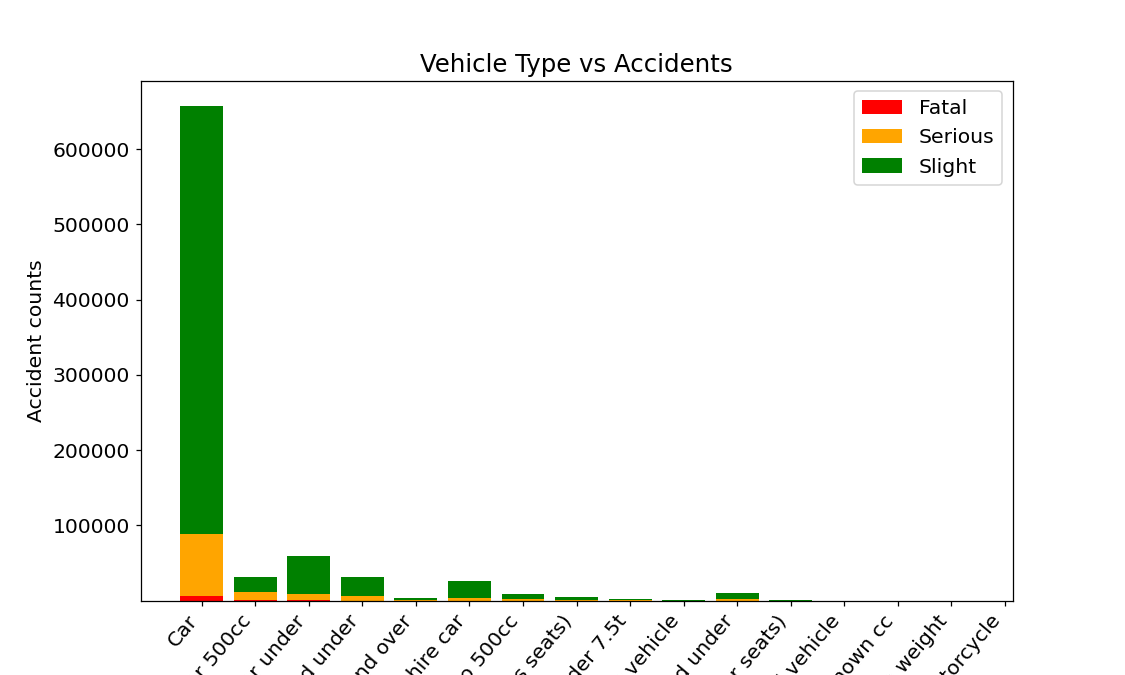

In [41]:
accident_sev_type = all_df.groupby(['Vehicle_Type','Accident_Severity'])['Accident_Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_type.sort_values(by=['Fatal','Serious','Slight'], ascending=False)

bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

r = sorted_df['Vehicle_Type']

sum12 = bar1+bar2

plt.figure(figsize=(10,6))
plt.title('Vehicle Type vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Vehicle_Type")
plt.ylabel("Accident counts")
plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='orange', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='green',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Accident_distribution_Vehicle_Type.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


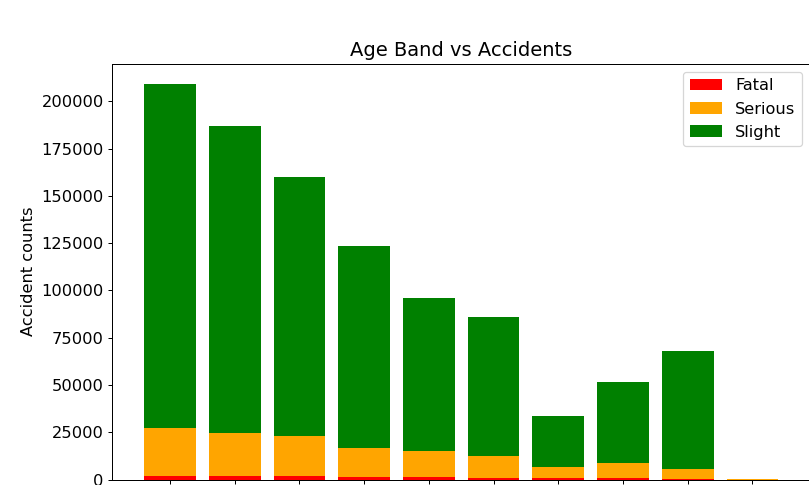

In [17]:
accident_sev_age = all_df.groupby(['Age_Band_of_Driver','Accident_Severity'])['Accident_Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_age.sort_values(by=['Fatal','Serious','Slight'], ascending=False)

bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

r = sorted_df['Age_Band_of_Driver']

sum12 = bar1+bar2

plt.figure(figsize=(10,6))
plt.title('Age Band vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Age Band")
plt.ylabel("Accident counts")
plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='orange', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='green',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Accident_distribution_Age_Band.png", bbox_inches = "tight")
plt.show()